Name: Hinal Patel 

CWID: 10473912


# Question 3 – Programming (20 points):
    
Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1. You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You need to decide a mutation rate and a crossover rate.


Plot the following in one figure: 1) the original noisy data, 2) the polynomial you obtained in Homework #1, and 3) the polynomial obtained from this implementation. Compare and discussion the difference in performance of the two polynomials obtained with two different methods.


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from heapq import nsmallest

Plotting the Original Noisy Data

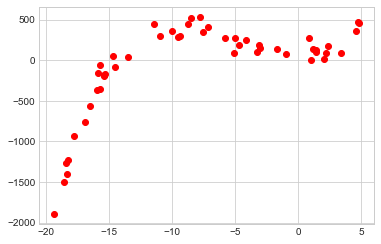

In [2]:
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x =  25*(np.random.rand(number_of_samples)-0.8)
y = 7* x + 15* x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples)
plt.plot(x,y,'ro')

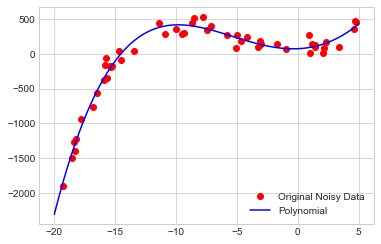

In [3]:
#polynomial Fitting using poly1D
p = np.poly1d(np.polyfit(x.flatten(),y.flatten(),4))
q = np.linspace(-20, 5 ,100)
plt.plot(x, y, 'ro', label = 'Original Noisy Data')
plt.plot(q,p(q),'b-',label = 'Polynomial')
plt.legend()
plt.show()

In [4]:
MSE = 0
for i, d in enumerate(x):
    MSE = MSE + (y[i] - p(d))**2/number_of_samples
print("MSE for Polynomial:", MSE)

MSE for Polynomial: 7779.76199366014


# Polynomial fitting using GA:

In [5]:
#Create 100 six-element arrays of random numbers

genes = []
for i in range(100):

    genes.append([random.uniform(-5,5) for _ in range(4)])
    
genes = np.asarray(genes)
genes[99]

array([ 1.64791847, -1.93710658, -2.34877529, -2.85787051])

In [6]:
y_new, badness, best = [0] * 100, [0] * 100, [0] * 100
for _ in range (1000):
    
    for i in range(100):

        y_new[i]=np.poly1d(genes[i])
        MSE = 0

        for j, d in enumerate(x):
            MSE += (y[j]-y_new[i](d))**2/number_of_samples
            badness[i]=MSE
        
    badness = np.asarray(badness) 
    idx = np.argpartition(badness,1)
        
    for i in range(0,10):
        best[i*10]=genes[idx[i]]
    
        for j in range(1,10):
            best[i*10+j]=genes[idx[i]]
            best[i*10+j][random.randint(0,3)]=best[i*10+j][random.randint(0,3)]*random.uniform(0,2)

    best = np.asarray(best)
    genes=best
for i in range(100):
    y_new[i]=np.poly1d(genes[i])
    MSE=0

    for k, d in enumerate(x):

        MSE += (y[k]-y_new[i](d))**2/number_of_samples
        badness[i]=MSE

idx = np.argpartition(badness, 10)
y_new[idx[0]]
print("MSE of GA is: ", badness[idx[0]])

MSE of GA is:  9270.739382036243


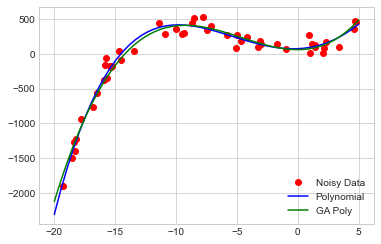

In [7]:
#Plotting the noisy data, polynomial and GA
xn = np.linspace(-20, 5, 50)
yn = p(xn)
yn2=y_new[idx[0]](xn)
plt.plot(x,y,'ro',label = 'Noisy Data')
plt.plot(xn,yn, 'b',label = 'Polynomial')
plt.plot(xn,yn2, 'g',label = 'GA Poly')
plt.legend()
plt.show()
